In [1]:
import navis 
import navis.interfaces.neuprint as neu
import NeuromodPlasticity as nmp 

import pathlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

plt.rcParams['pdf.fonttype']=42

%load_ext autoreload
%autoreload 2 


%matplotlib inline

In [2]:
figfolder = pathlib.Path('/media/mplitt/SSD_storage/fig_scratch/connectomics/upstream_columnar')
figfolder.mkdir(parents=True, exist_ok=True)


In [3]:
c = nmp.connectomics.npt_client()

In [4]:
eb, pb, gall, noduli = neu.fetch_roi("EB"), neu.fetch_roi("PB"), neu.fetch_roi("GA(R)"), neu.fetch_roi("NO")

In [5]:
epgs,_ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='EPG'))
l_epg_inst, r_epg_inst = [], []
for inst in np.sort(epgs['instance'].unique()):
    if 'EPG(PB08)_L' in inst:
        l_epg_inst.append(inst)
    elif 'EPG(PB08)_R' in inst:
        r_epg_inst.append(inst)
l_epg_inst = l_epg_inst[::-1]

epg_cmap = plt.get_cmap('hsv', len(l_epg_inst))
epg_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_epg_inst, r_epg_inst)):
    epg_colors[l_inst] = epg_cmap(i)
    epg_colors[r_inst] = epg_cmap(i)
epgs['color'] = epgs['instance'].map(epg_colors)




pens, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type='PEN_a.*'))
l_pens_inst, r_pens_inst = [], []
for inst in np.sort(pens['instance'].unique()):
    if 'PEN_a(PB06a)_L' in inst:
        l_pens_inst.append(inst)
    elif 'PEN_a(PB06a)_R' in inst:
        r_pens_inst.append(inst)
l_pens_inst = l_pens_inst[::-1]
pen_colors = {}
for i, (l_inst, r_inst) in enumerate(zip(l_pens_inst, r_pens_inst)):
    pen_colors[l_inst] = epg_cmap(i)
    pen_colors[r_inst] = epg_cmap(i)
pens['color'] = pens['instance'].map(pen_colors)






# specify epg and pen colormaps
# reverse order for right hemisphere


In [6]:
# for each el
els_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EL'))
els_df.head()

,bodyId,instance,type,pre,post,downstream,upstream,mito,size,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,696682163,EL(EQ5)_L,EL,1100,4835,3464,4835,632,1281064545,Traced,False,Roughly traced,PDM01,301.0,"[27968, 17648, 10720]","{'SNP(L)': {'pre': 1, 'downstream': 3}, 'SMP(L...",EBGAs,"[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2...","[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2..."
1,725942718,EL(EQ5)_R,EL,927,5071,3047,5071,624,1343378417,Traced,False,Roughly traced,PDM02,301.0,"[21287, 15591, 10976]","{'CX': {'pre': 918, 'post': 5066, 'downstream'...",EBGAs,"[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E...","[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E..."
2,725951660,EL(EQ5)_R,EL,1135,5025,3539,5025,621,1322049874,Traced,False,Roughly traced,PDM03,301.0,"[21967, 15575, 10912]","{'CX': {'pre': 1125, 'post': 5012, 'downstream...",EBGAs,"[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E...","[CRE(-RUB)(L), CRE(L), CX, EB, EBr1, EBr2r4, E..."
3,727350004,EL(EQ5)_L,EL,943,4545,2907,4545,545,1178553443,Traced,False,Roughly traced,PDM01,301.0,"[25523, 17477, 10912]","{'INP': {'pre': 17, 'post': 62, 'downstream': ...",EBGAs,"[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2...","[CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EBr1, EBr2..."
4,820144012,EL(EQ5)_L,EL,975,4718,3027,4718,615,1326450645,Traced,False,Roughly traced,PDM02,351.0,"[28741, 16678, 12304]","{'INP': {'pre': 18, 'post': 58, 'downstream': ...",EBGAs,"[ATL(L), CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EB...","[ATL(L), CRE(-ROB,-RUB)(R), CRE(R), CX, EB, EB..."


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
6    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
10   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
12   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
17  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
22  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
23  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
24  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
27  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
5    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
22  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
23  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
29  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
13   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
17   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
21  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
24  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
28  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
8    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
10   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
13   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
19  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
23  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
24  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
29  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/10 [00:00<?, ?it/s]

        bodyId         type         instance
4    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
5    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
11   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
15   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
16   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
23  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
24  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
26  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
30  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
15   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
18   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
20  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
23  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
25  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
1    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
3    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
6    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
8    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
9   1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
13  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
14  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
16  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/17 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/17 [00:00<?, ?it/s]

Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/13 [00:00<?, ?it/s]

        bodyId         type         instance
5    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
6    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
7    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
11   757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
13   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
14   849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
19   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
20  1002507131  PEN_a(PEN1)  PEN_a(PB06a)_R7
25  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
27  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
28  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
30  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
36  5813080979  PEN_a(PEN1)  PEN_a(PB06a)_L5


Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/14 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/14 [00:00<?, ?it/s]

Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/11 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
10   663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
12   664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
17   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
19   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
23  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
24  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
27  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
29  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/9 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/9 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
10   634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
13   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
15   972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
19  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
20  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
25  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
2    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
4    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
8    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
13  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
17  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
22  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
3    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
5    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
7    849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
18  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
20  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/15 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/15 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
3    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
6    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
14  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
18  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
21  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/10 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/10 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    663190769  PEN_a(PEN1)  PEN_a(PB06a)_R6
9    664645558  PEN_a(PEN1)  PEN_a(PB06a)_L6
16   847336755  PEN_a(PEN1)  PEN_a(PB06a)_R6
18   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
21  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
23  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
25  1380495496  PEN_a(PEN1)  PEN_a(PB06a)_L6
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
1    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
2    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
5    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
15  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
16  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
19  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3
25  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/13 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/13 [00:00<?, ?it/s]

Fetching:   0%|          | 0/7 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/7 [00:00<?, ?it/s]

        bodyId         type         instance
3    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
4    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
8    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
15   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
19  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
20  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
24  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


Fetching:   0%|          | 0/11 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
5    757055317  PEN_a(PEN1)  PEN_a(PB06a)_L4
7    849482511  PEN_a(PEN1)  PEN_a(PB06a)_L4
9    972892437  PEN_a(PEN1)  PEN_a(PB06a)_R2
11  1125964630  PEN_a(PEN1)  PEN_a(PB06a)_R8
15  1218732640  PEN_a(PEN1)  PEN_a(PB06a)_R9
16  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
18  1508334312  PEN_a(PEN1)  PEN_a(PB06a)_L3


Fetching:   0%|          | 0/15 [00:00<?, ?it/s]

Plot neurons:   0%|          | 0/15 [00:00<?, ?it/s]

Fetching:   0%|          | 0/8 [00:00<?, ?it/s]

Subsetting:   0%|          | 0/8 [00:00<?, ?it/s]

        bodyId         type         instance
2    508793049  PEN_a(PEN1)  PEN_a(PB06a)_L7
3    509410587  PEN_a(PEN1)  PEN_a(PB06a)_R4
6    570461892  PEN_a(PEN1)  PEN_a(PB06a)_R3
9    634608104  PEN_a(PEN1)  PEN_a(PB06a)_L2
12   910447075  PEN_a(PEN1)  PEN_a(PB06a)_R5
18  1127471692  PEN_a(PEN1)  PEN_a(PB06a)_L8
21  1220576923  PEN_a(PEN1)  PEN_a(PB06a)_L9
27  5813056953  PEN_a(PEN1)  PEN_a(PB06a)_R4


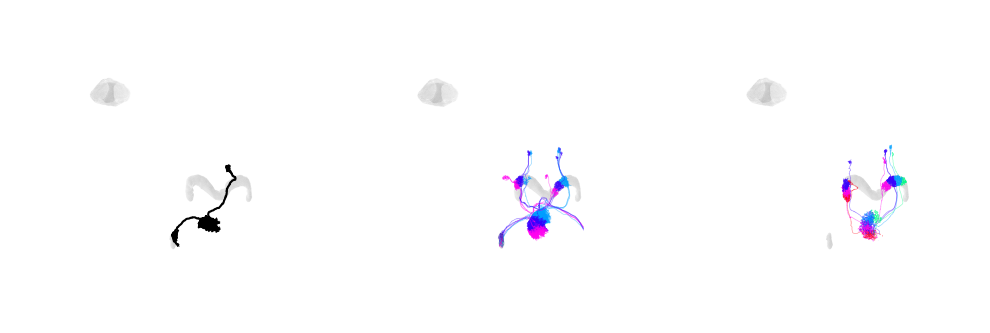

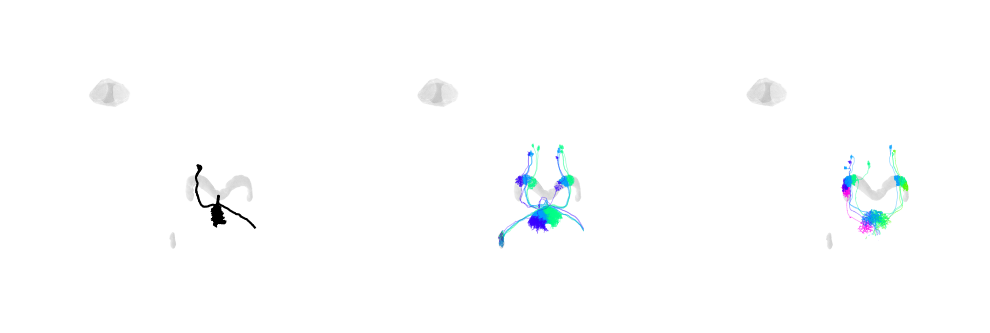

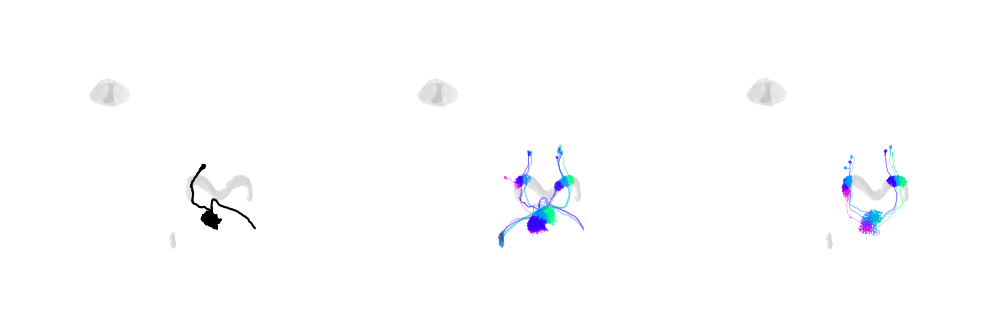

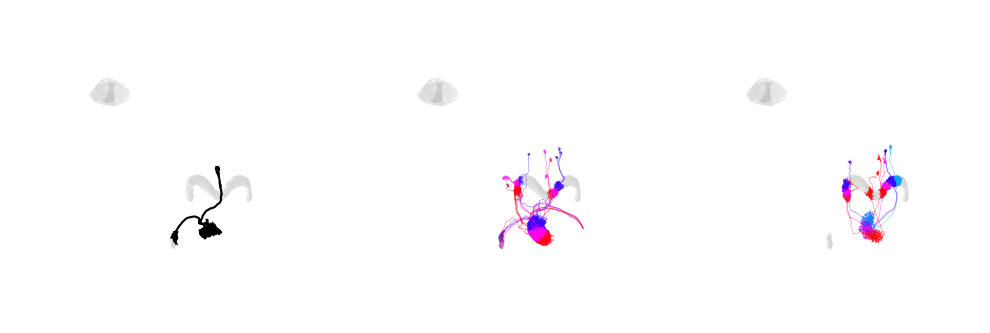

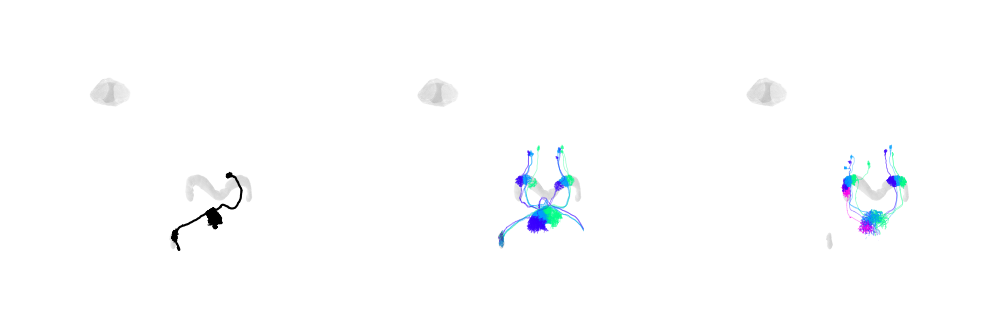

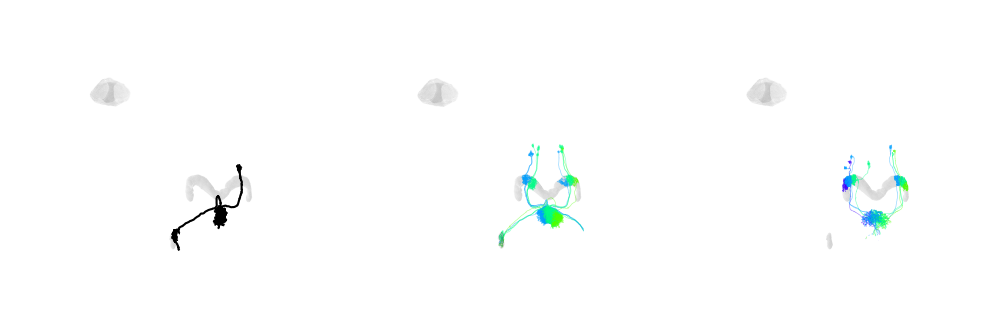

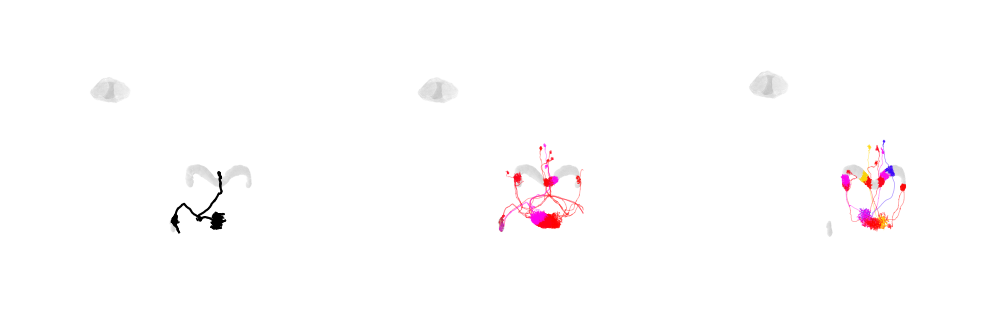

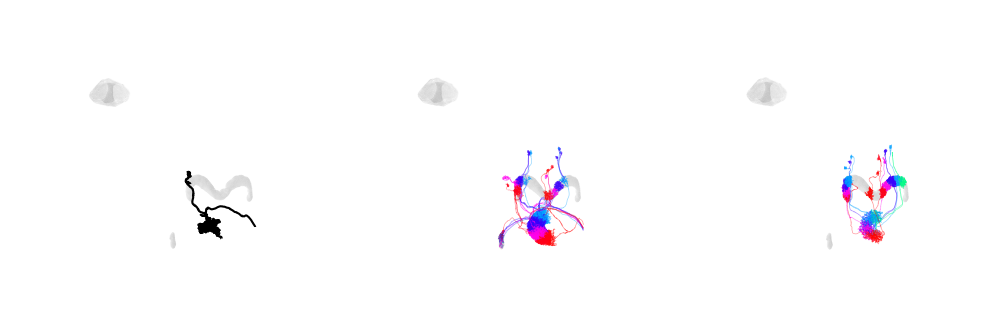

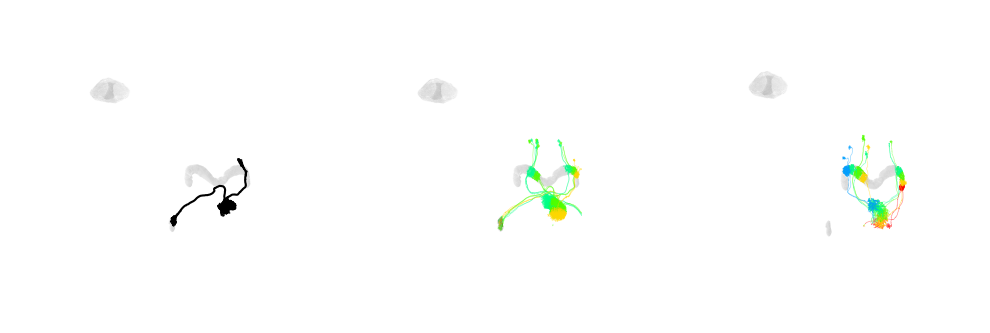

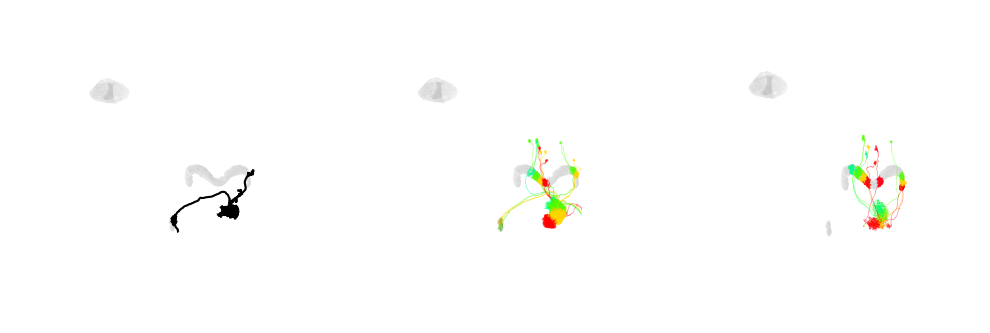

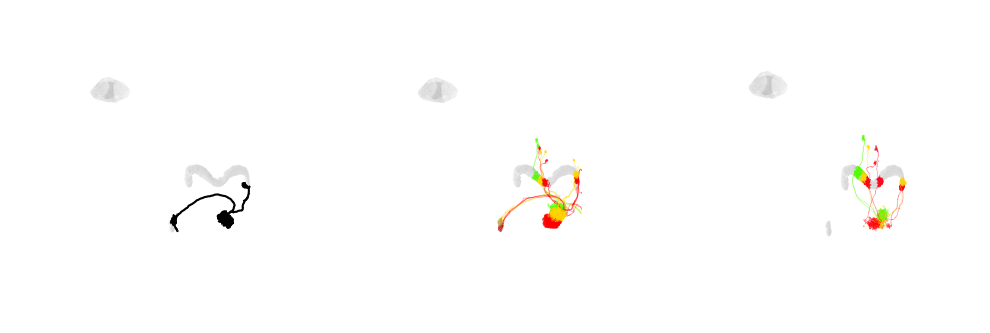

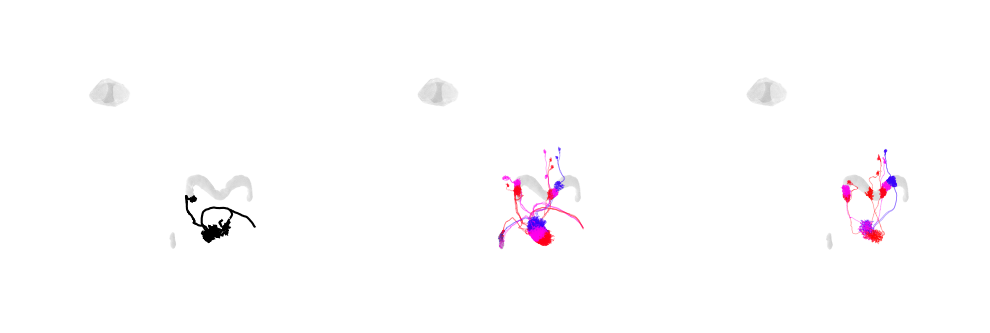

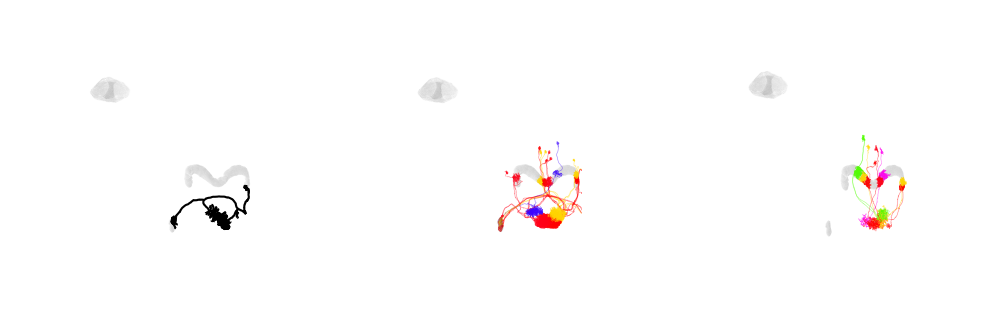

Error in callback <function flush_figures at 0x78038f0afba0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# get el neurons




for i, el in els_df.iloc[:].iterrows():
    
    # get all presynaptic EPGs and PENs
    pre_neurons, _ = neu.queries.fetch_adjacencies(
                                sources = neu.NeuronCriteria(type = ['EPG', 'PEN_a.*', 'PEN_b.*',]), 
                                targets = [el['bodyId']],
                                rois=['EB'],
                                min_total_weight=3,
                                )
    
    pre_epgs = pre_neurons[pre_neurons['type'] == 'EPG']
    pre_epg_skeletons = neu.fetch_skeletons(pre_epgs['bodyId'])
    el_skeleton = neu.fetch_skeletons(el['bodyId'])

    fig = plt.figure(figsize=(10, 5))
    ax = [fig.add_subplot(131, projection='3d')]
    ax.append(fig.add_subplot(132, projection='3d', sharex=ax[0], sharey=ax[0], sharez=ax[0]))
    ax.append(fig.add_subplot(133, projection='3d', sharex=ax[0], sharey=ax[0], sharez=ax[0]))    
    colors = []
    for i, pre_epg in pre_epgs.iterrows():
        # print(pre_epg)
        if pre_epg['instance'] in epg_colors:
            colors.append(epg_colors[pre_epg['instance']])
        else:
            print('error')

    # colors.append((0, 1, 0))
    _ = navis.plot2d(
                    [el_skeleton, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=1.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=1,
                    color=((0,0,0)),
                    ax = ax[0],
                )
    _ = navis.plot2d(
                    [*pre_epg_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[1]
                )

   

    
    # plt.tight_layout()


    pre_pens = pre_neurons[pre_neurons['type'].str.contains('PEN_a')]
    pre_pen_skeletons = neu.fetch_skeletons(pre_pens['bodyId'])
    pre_pen_skeletons = navis.in_volume(pre_pen_skeletons, noduli, mode='OUT' )
    print(pre_pens)

    colors = []
    for i, pre_pen in pre_pens.iterrows():
        # print(pre_pen)
        if pre_pen['instance'] in pen_colors:
            colors.append(pen_colors[pre_pen['instance']])
        else:
            colors.append((1, 0, 0))

    
    _ = navis.plot2d(
                    [*pre_pen_skeletons, eb, pb, gall],
                    method="3d",
                    connectors=False,
                    linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
                    view=("x", "-z"),
                    alpha=0.4,
                    color=colors,
                    ax=ax[2]
                )
    ax[0].elev = -20
    ax[1].elev = -20
    ax[2].elev = -20
    for a in ax:
        # a.elev = -20
        a.grid(False)
        a.set_axis_off()


    plt.tight_layout()
    fig.savefig(figfolder / f'EL{i}_pre.pdf', bbox_inches='tight')

    




# get all presynaptic EPG and PENs


# plot el with presynaptic EPGs, color EPGs by wedge

# plot el with presynaptic L PENs, color PENs by wedge

# plot el with presynaptic R PENs, color PENs by wedge






In [ ]:
eb.vertices

TrackedArray([[25867.951172, 24591.279297, 16341.05957 ],
              [25814.601562, 24420.025391, 16397.980469],
              [25600.810547, 24463.072266, 16389.527344],
              ...,
              [28206.248047, 26633.550781, 24133.619141],
              [28043.789062, 26720.876953, 24139.322266],
              [28150.042969, 26689.703125, 24136.238281]])

In [7]:
from sklearn.decomposition import PCA 


eb_origin = eb.vertices.mean(axis=0)
eb_basis = PCA(n_components=3).fit(eb.vertices).components_
eb.vertices = (eb.vertices - eb_origin) @ eb_basis.T


eb_change_of_basis = lambda x: (x - eb_origin) @ eb_basis.T


phase = np.arctan2(eb.vertices[:, 1], eb.vertices[:, 0])
radius = np.sqrt(eb.vertices[:, 0]**2 + eb.vertices[:, 1]**2)

In [43]:
bins = np.linspace(-np.pi, np.pi, num=int(360/2) + 1)
phase_bin_inds = np.digitize(phase, bins) 
radius_min = [np.amin(radius[phase_bin_inds == i]) for i in range(1, len(bins))]
radius_max = [np.amax(radius[phase_bin_inds == i]) for i in range(1, len(bins))]

x = np.concatenate([bins[:-1]-2*np.pi, bins[:-1], bins[:-1]+2*np.pi])
radius_min_lookup = sp.interpolate.interp1d(x, np.concatenate([radius_min for i in range(3)]), kind='cubic')
radius_max_lookup = sp.interpolate.interp1d(x, np.concatenate([radius_max for i in range(3)]), kind='cubic')

scale_radius = lambda phase, radius: ((radius - radius_min_lookup(phase))/(radius_max_lookup(phase)-radius_min_lookup(phase)) + .2)/1.2

#  bin phases by 5 degrees
# find mesh points in bin
#  find min and max radius in bin
# get spline for min and max radii
#  define functin to scale radius based on angle



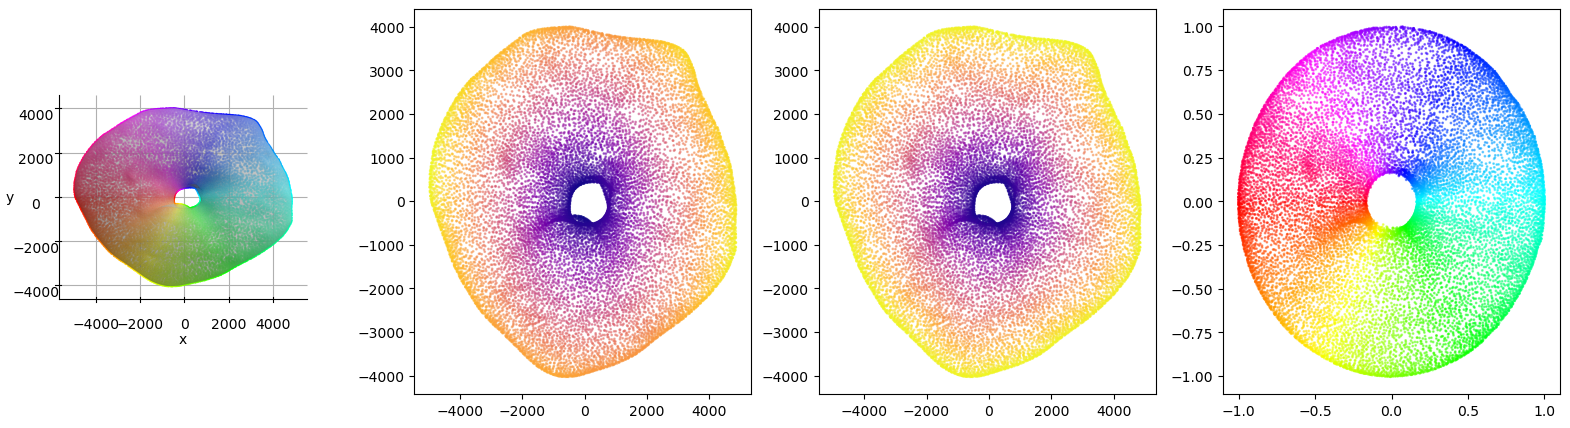

In [44]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(141, projection='3d')
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)
fig, ax = navis.plot2d(
            [eb],
            method="3d",
            connectors=False,
            linewidth=0.5,  # Make neuron a bit thinner to emphasize the synapses
            view=("x", "y"),
            alpha=0.4,
            ax=ax
        )

ax.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=phase, s=1, alpha=0.5, cmap='hsv')

ax2.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=radius, s=1, alpha=0.5, cmap='plasma')
ax3.scatter(eb.vertices[:, 0], eb.vertices[:, 1], c=scale_radius(phase, radius), s=1, alpha=.5, cmap='plasma')


sc_radius = scale_radius(phase, radius)
eb_sc_x, eb_sc_y = np.cos(phase) * sc_radius, np.sin(phase) * sc_radius
ax4.scatter(eb_sc_x, eb_sc_y, c=phase, s=1, alpha=0.5, cmap='hsv')



  0%|          | 0/431 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/354 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/367 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/301 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/321 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/262 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/345 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/309 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/310 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/345 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/246 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/294 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/283 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/159 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/163 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

  0%|          | 0/182 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/124 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/183 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/222 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/176 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/156 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/152 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/202 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

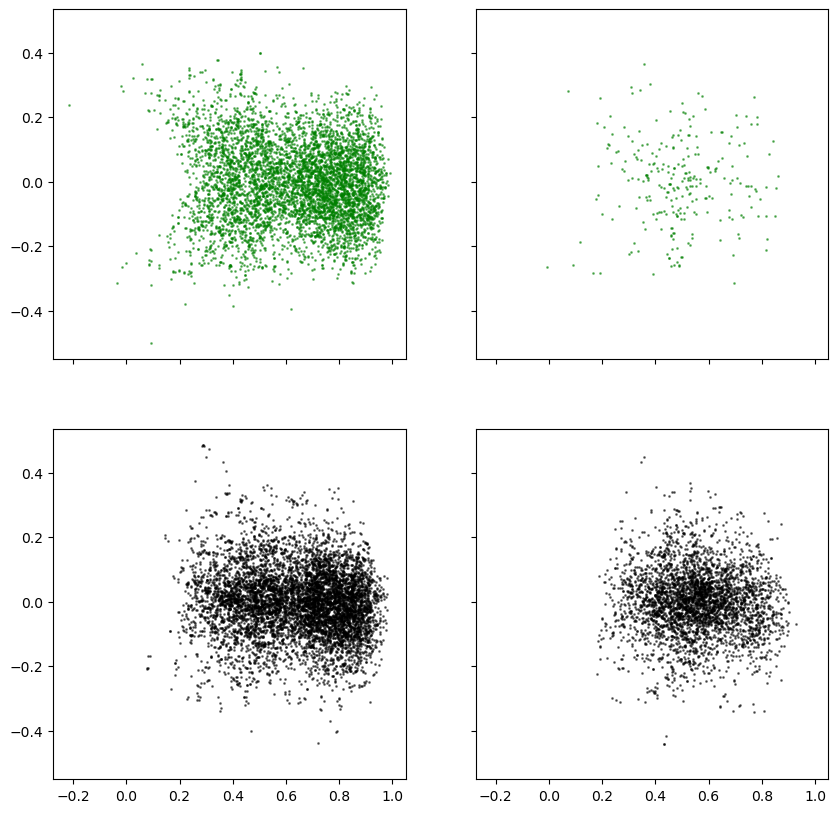

In [45]:
def scale_rotate_synapse_type(bodyId, type):
    postsynapses = neu.queries.fetch_synapse_connections(bodyId, neu.queries.NeuronCriteria(type=type), neu.queries.SynapseCriteria( type = 'post', rois=['EB']))
    postsynapses[['eb_x', 'eb_y', 'eb_z']] = eb_change_of_basis(postsynapses[['x_post', 'y_post', 'z_post']])
    postsynapses['phase'] = np.arctan2(postsynapses['eb_y'], postsynapses['eb_x'])
    postsynapses['radius'] = np.sqrt(postsynapses['eb_x']**2 + postsynapses['eb_y']**2)
    postsynapses['scaled_radius'] = scale_radius(postsynapses['phase'], postsynapses['radius'])
    postsynapses['rad_scaled_x'] = np.cos(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_y'] = np.sin(postsynapses['phase']) * postsynapses['scaled_radius']
    postsynapses['rad_scaled_z'] = postsynapses['eb_z']

    avg_angle = np.angle(np.exp(1j*postsynapses['phase']).mean())

    rotated_synapes = (np.array([[np.cos(avg_angle), -1*np.sin(avg_angle), 0],
              [np.sin(avg_angle), np.cos(avg_angle), 0],
              [0, 0, 1]]).T @ postsynapses[['rad_scaled_x', 'rad_scaled_y', 'rad_scaled_z']].values.T).T
    
    postsynapses['rotated_x'] = rotated_synapes[:, 0]
    postsynapses['rotated_y'] = rotated_synapes[:, 1]
    postsynapses['rotated_z'] = rotated_synapes[:, 2]
    postsynapses['rotated_phase'] = np.arctan2(rotated_synapes[:, 1], rotated_synapes[:, 0])
    return postsynapses

# for each el
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
el_epg_synapses, el_pen_synapses = [], []
for i, el in els_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'EPG')
    el_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(el['bodyId'], 'PEN_a.*')
    el_pen_synapses.append(pen_postsynapses)

    

    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[0,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    ax[0,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='green', s=1, alpha=0.5)
    # print(rotated_synapes)
el_epg_synapses = pd.concat(el_epg_synapses)
el_pen_synapses = pd.concat(el_pen_synapses)




epgs_df, _ = neu.queries.fetch_neurons(neu.NeuronCriteria(type = 'EPG'))
epg_epg_synapses, epg_pen_synapses = [], []
# fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
for i, epg in epgs_df.iloc[:].iterrows():
    epg_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'EPG')
    epg_epg_synapses.append(epg_postsynapses)
    pen_postsynapses = scale_rotate_synapse_type(epg['bodyId'], 'PEN_a.*')
    epg_pen_synapses.append(pen_postsynapses)

    
    # ax[0].scatter(epg_rotated_synapses[:, 0], epg_rotated_synapses[:, 1], c=np.arctan2(epg_rotated_synapses[:,0], epg_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    # ax[1].scatter(pen_rotated_synapses[:,0], pen_rotated_synapses[:, 1], c=np.arctan2(pen_rotated_synapses[:,0], pen_rotated_synapses[:,1]), s=1, alpha=0.5, cmap='hsv', vmin=-np.pi, vmax=np.pi)
    ax[1,0].scatter(epg_postsynapses['rotated_x'], epg_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)
    ax[1,1].scatter(pen_postsynapses['rotated_x'], pen_postsynapses['rotated_y'], color='black', s=1, alpha=0.5)

epg_epg_synapses = pd.concat(epg_epg_synapses)
epg_pen_synapses = pd.concat(epg_pen_synapses)



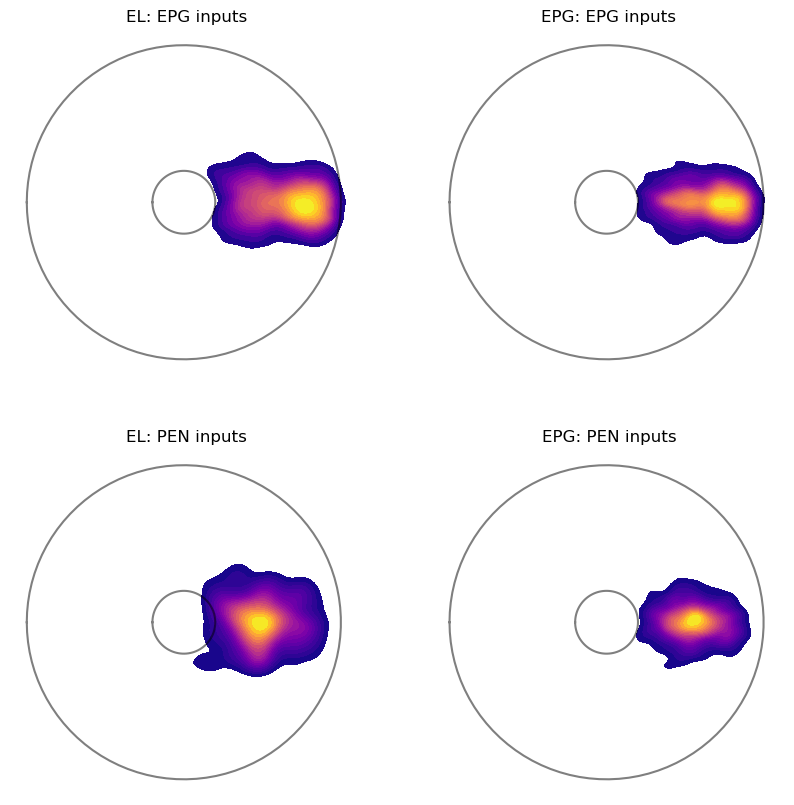

In [53]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
l = 20
sns.kdeplot(
    el_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
)
ax[0,0].set_title('EL: EPG inputs')

sns.kdeplot(
    epg_epg_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[0,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,
   

)
ax[0,1].set_title('EPG: EPG inputs')

sns.kdeplot(
    el_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,0],
    cmap='plasma',
    # color='green',
    levels=l,
    fill=True,
  
)
ax[1,0].set_title('EL: PEN inputs')

sns.kdeplot(
    epg_pen_synapses,
    x='rotated_x',
    y='rotated_y',
    ax=ax[1,1],
    cmap='plasma',
    # color='black',
    # linewidth=0,
    levels=l,
    fill=True,

)
ax[1,1].set_title('EPG: PEN inputs')

min_rad = .2
max_rad = 1.
angles = np.linspace(-np.pi, np.pi, num=100)
for a in ax.flatten():

    a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)
    # a.set_xlim(-max_rad, max_rad)
    # a.set_ylim(-max_rad, max_rad)
   
    a.set_aspect('equal')
    a.grid(False)
    a.set_axis_off()
    # a.plot(np.cos(angles) * min_rad, np.sin(angles) * min_rad, color='black', alpha=0.5)
    # a.plot(np.cos(angles) * max_rad, np.sin(angles) * max_rad, color='black', alpha=0.5)

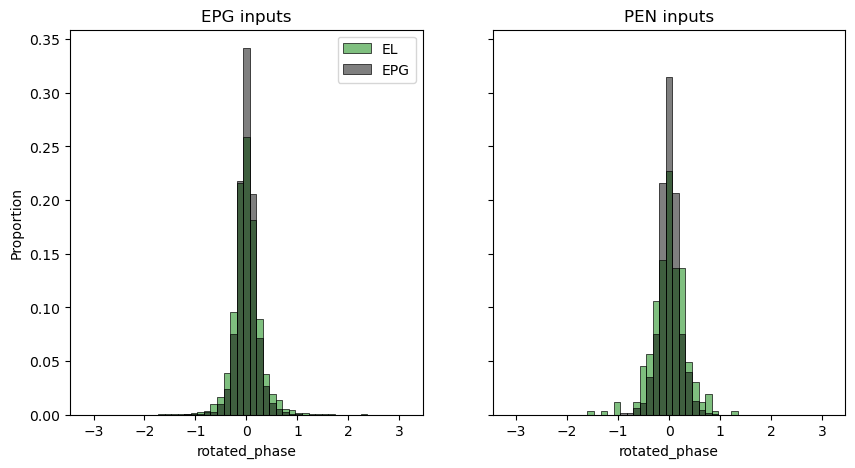

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
commmon_args = {
    'stat': 'proportion',
    'bins': np.linspace(-np.pi, np.pi, num=50),
    # 'levels': 10,
    'fill': True,
    'alpha': 0.5,
}
sns.histplot(
    el_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='green',
    label='EL',
    **commmon_args,
)

sns.histplot(
    epg_epg_synapses,
    x='rotated_phase',
    ax=ax[0],
    color='black',
    label='EPG',
    **commmon_args,
)

sns.histplot(
    el_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='green',
    **commmon_args,
)
sns.histplot(    
    epg_pen_synapses,
    x='rotated_phase',
    ax=ax[1],
    color='black',
    **commmon_args,
)

ax[0].set_title('EPG inputs')
ax[1].set_title('PEN inputs')
ax[0].legend()


In [ ]:
#  for each EL, get adjacency matrix of EPGs and PENs


# for each EL, calculate relative weight of most connected instances of PEN and EPG
#  compare that to EPG-PEN relative weights
